In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
from collections import Counter

In [2]:
df = pd.read_csv("../data/processed/carpredict_clean.csv")

df.sample(10)

,price,transmission,condition,make,model,car_age,engine_info,color,mileage_imputed
2434,2180000,Automatic,Kenyan Used,Toyota,Land Cruiser Prado,20,3.0 D-4D 3dr,Blue,139852.0
10882,540000,Automatic,Kenyan Used,Nissan,Tiida,17,1.5 dCi,Black,163000.0
4343,5800000,Automatic,Foreign Used,Jeep,Cherokee,9,Limited 4x4,White,97000.0
13724,450000,Automatic,Kenyan Used,Nissan,Note,14,1.4,White,136658.0
6608,1170000,Automatic,Foreign Used,Toyota,Sienta,11,1.5 AWD,Blue,94000.0
3068,1900000,Automatic,Foreign Used,Toyota,Noah,10,2.0 FWD (7 Seater),White,65000.0
4854,1700000,Automatic,Kenyan Used,Toyota,Land Cruiser Prado,21,2.7 5dr,Silver,174000.0
7552,2600000,Automatic,Foreign Used,Volkswagen,Tiguan,11,Unknown,Black,35480.0
12126,325000,Automatic,Kenyan Used,Toyota,Vitz,24,1.3 AWD 3dr,Red,180000.0
3319,2990000,Automatic,Kenyan Used,Toyota,Land Cruiser,18,100 4.7 Executive,Black,131000.0


## Plot a histogram of car prices

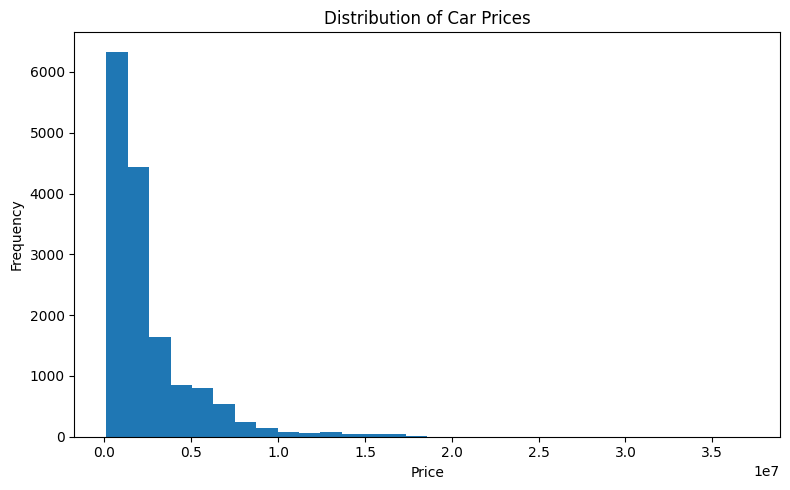

In [3]:
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30) 
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show();

## Use a boxplot to compare price across transmission types

<Figure size 800x500 with 0 Axes>

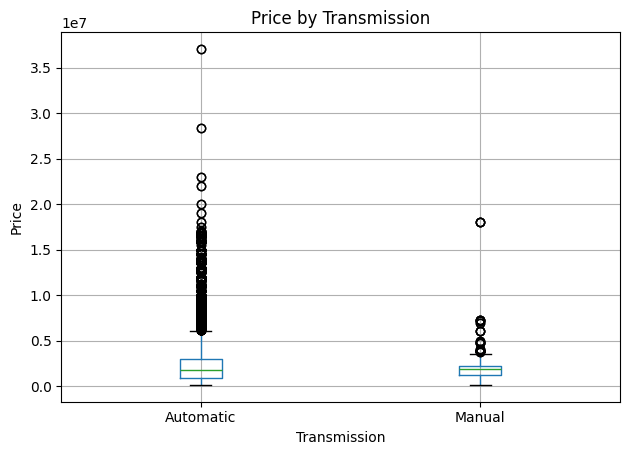

In [9]:
fig1 = plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='transmission')
plt.title('Price by Transmission')
plt.suptitle('')  
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.tight_layout()
plt.show();

outdir = "../outputs"

outpath = os.path.join(outdir, "price_v_transmission.png")

# you can choose dpi, format, etc.
fig1.savefig(outpath, dpi=300, format="png", bbox_inches="tight")

## Create a scatter plot of mileage vs. price, colored by car condition

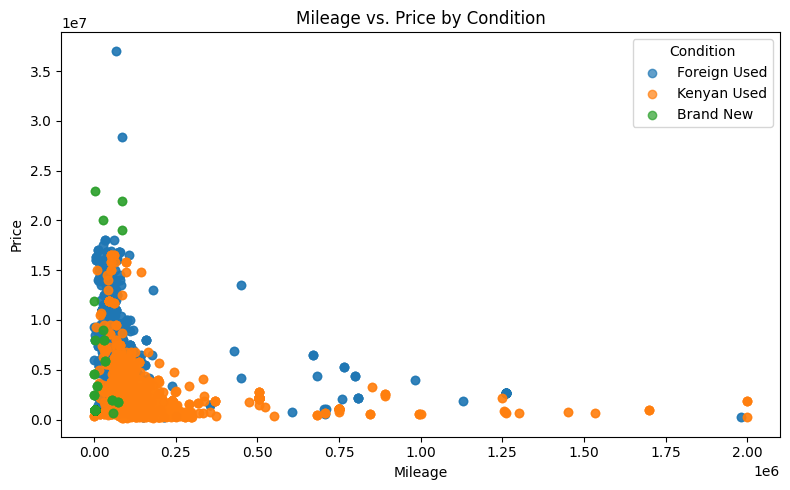

In [7]:
fig = plt.figure(figsize=(8, 5))
for cond in df['condition'].unique():
    subset = df[df['condition'] == cond]
    plt.scatter(subset['mileage_imputed'], subset['price'], label=cond, alpha=0.7)
plt.title('Mileage vs. Price by Condition')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Condition')
plt.tight_layout()
plt.show();

## Generate a bar chart of average price per brand

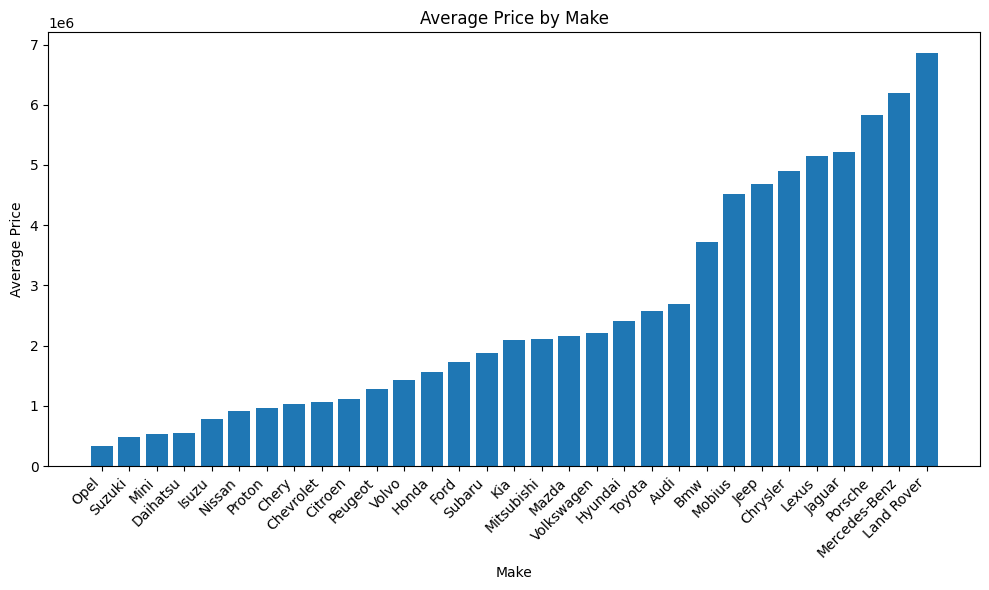

In [5]:
avg_price = df.groupby('make')['price'].mean().sort_values()

fig = plt.figure(figsize=(10, 6))
plt.bar(avg_price.index, avg_price.values)
plt.title('Average Price by Make')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();



In [6]:
outdir = "../outputs"

outpath = os.path.join(outdir, "avg_price_by_brand.png")

# you can choose dpi, format, etc.
fig.savefig(outpath, dpi=300, format="png", bbox_inches="tight")

## Produce a correlation heatmap (after preprocessing) for numerical features

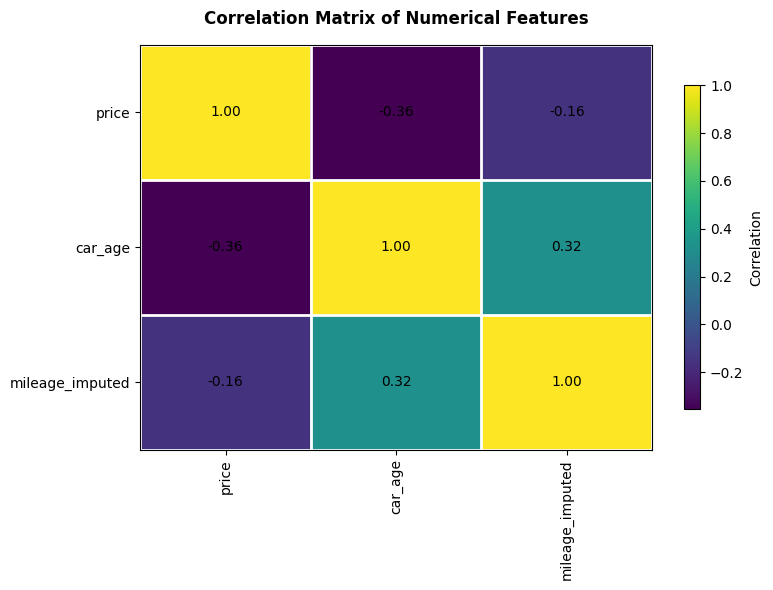

In [7]:
num = df.select_dtypes(include='number')
corr = num.corr()

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))

# Display the correlation matrix
cax = ax.imshow(corr.values, interpolation='nearest', aspect='auto')

# Colorbar
cb = fig.colorbar(cax, ax=ax, shrink=0.8)
cb.set_label('Correlation')

# Tick labels
labels = corr.columns
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels)

# Annotate each cell with the numeric value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center')

# Grid lines to separate cells
ax.set_xticks(np.arange(-.5, len(labels), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(labels), 1), minor=True)
ax.grid(which='minor', color='w', linewidth=2)
ax.tick_params(which="minor", bottom=False, left=False)

# Title and layout
ax.set_title('Correlation Matrix of Numerical Features', pad=15, fontweight='bold')
plt.tight_layout()
plt.show();